# Algorytmy kwantowe - przegląd


## Deutsch Algorithm


Wyobraźmy sobie, ze ktoś ukrywa dwie monety w rękach. 
Poniewaz kazda moneta ma dwie strony (niezalezne) dwie ręcę mogą ukryć 4 mozliwe sytuacje. 
Jeśli w obu rękach mamy te same strony mozemy powiedziec o `stałej funkcji`, która przyjmuje lewą rękę a zwraca prawą. Jeśli wynik ulega zmianie mozemy powiedziec o funkcji `zbalansowanej`.

W przypadku monet, nawet jeśli odsłonimy monetę w lewej ręce nie jesteśmy w stanie stwierdzić, bez sprawdzenia, co jest w prawej ręce. A teraz wyobraź sobie 100 takich rąk. Aby mieć pewność czy masz doczynienia z funkcją stałą musisz (czy chcesz czy nie) sprawdzić wszystkie mozliwości - wystarczy jedna róznica, aby funkcja była zbalansowana. 

Co powiesz jeśli stwierdzę, ze kwantowy komputer moze rozwiązać problem otwierając wszystkie ręcę za jednym razem? 

Dla funkcji boolowskiej $f:\{0,1\} \rightarrow \{0, 1\}$ mówimy, ze $f$ jest zbalansowana jeśli $f(0) \neq f(1)$ lub stała jeśli $f(0) = f(1)$.

$$
f(0) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$
$$
f(1) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$
Taka funkcja moze być reprezentowana jako  macierz: 
$$
f = \begin{pmatrix} 1 \,\, 1 \\0 \,\, 0 \end{pmatrix}
$$

Jednak, aby była uzyteczna dla obliczeń kwantowych musi być odwracalna i unitarna.

Aby sprawdzić i jednoznacznie stwierdzić czy funkcja, którą się posługujemy jest stała czy zbalansowana w klasycznym przypadku musimy sprawdzić oba wyniki $f(0)$ i $f(1)$.

Bardzo często tego typu modelowanie (funkcję) nazywa się `black box` lub `oracle`. 

Tworzymy dwa rejestry kwantowe - input $|x\rangle$ i output $|y\rangle$

Definiujemy rejestr outputu jako wynik działania XOR na rejestrze inputu: 
$$
U_f: |x\rangle ,|y\rangle \to |x\rangle, |y \oplus f(x)\rangle
$$
$$
U^{-1}_f: |x\rangle, |y \oplus f(x)\rangle \to |x\rangle ,|y\rangle
$$

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

Krok 1: tworzymy obwod kwantowy dla dwóch kubitów: 
- pierwszy w stanie 0 
- drugi w stanie 1

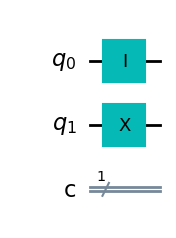

In [2]:
# krok 1 2 kubitowy circuit
qc = QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
qc.draw(output='mpl')

Krok 2: hadamard na oba kubity

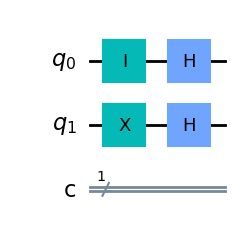

In [3]:
# krok 2 hadamard na oba kubity - tworzymy superpozycje aby działać na 4 stanach jednocześnie

qc.h(0)
qc.h(1)
qc.draw(output='mpl')

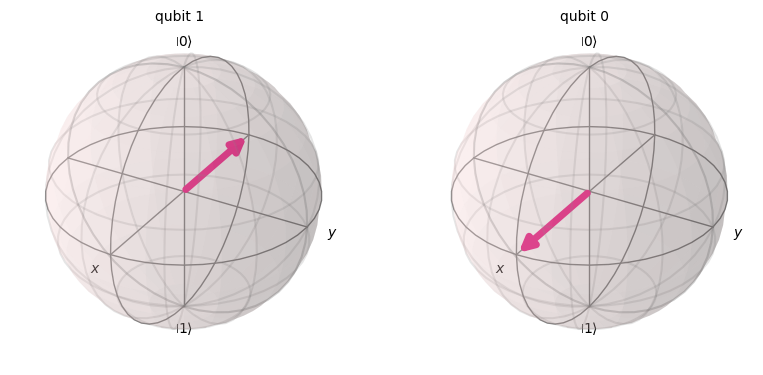

In [4]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

In [5]:
state.draw('latex')

<IPython.core.display.Latex object>

Po zastosowaniu bramek hadamarda, otrzymujemy:
$$ 
\frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)  \,\,\,\,\,\,\,\, Eq. 1
$$

Zauwazmy ze drugi kubit jest w stanie - ($H|1\rangle$), mozemy zdefiniować powyzsze rownanie jako:

$$ \frac{(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle}{\sqrt{2}}\cdot{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

Jeśli $f$ jest stała, wtedy $f(0)=0$ i $(-1)^0=1$ oraz $f(1)=0$

otrzymujemy:

$$\pm{\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

W przeciwnym przypadku ($f$ jest zbalansowana):
$$\pm{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$



Dla stałej funkcji  pierwszy kubit jest ustawiony jako: 
$${\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}$$
ponowne zastosowanie bramki H zwroci nam stan $|0\rangle$.

Analogicznie, dla zbalansowanej funkcji dostaniemy stan $|1\rangle$.

Na podstawie tej informacji, mierząc TYLKO pierwszy kubit (po zastosowaniu bramki H) otrzymamy stan $|0\rangle$
albo $|1\rangle$ co daje jednoznaczą odpowiedź z jaką funkcją mamy do czynienia. 

Następnym krokiem jest zastosowanie bramki działającej na dwóch kubitach.
$$
U_f: \ket{x} ,\ket{y} \to \ket{x}, \ket{y \oplus f(x)}
$$
Zakładając $f(x)=x$ wyrocznię (oracle) mozna zrealizować jako bramkę `CNOT`. 

Jeśli $f(x)=0$ wyrocznią jest bramka `Id`.

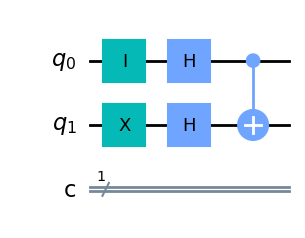

In [6]:
qc.cx(0,1)
qc.draw(output='mpl')

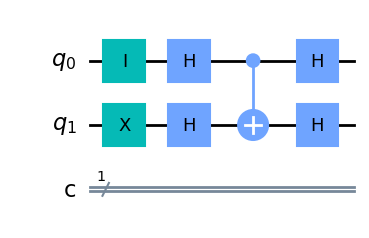

In [7]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

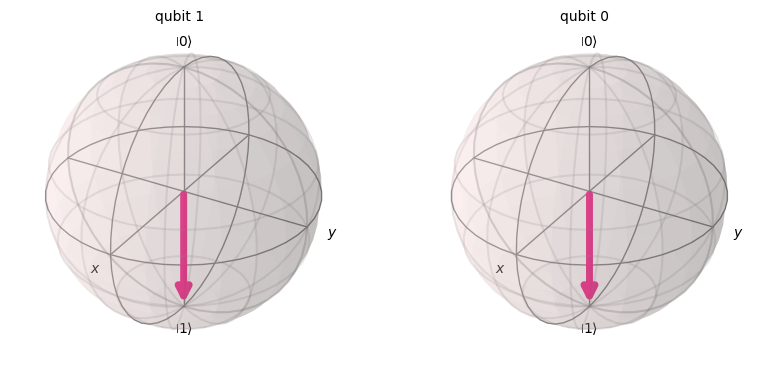

In [8]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

In [9]:
state.draw('latex')

<IPython.core.display.Latex object>

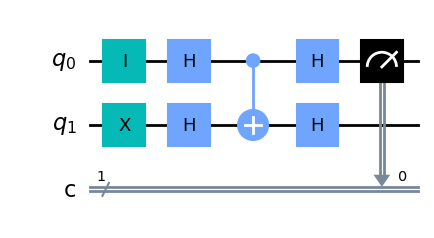

In [10]:
from qiskit import execute, Aer

qc.measure(0,0)
display(qc.draw(output='mpl'))

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)

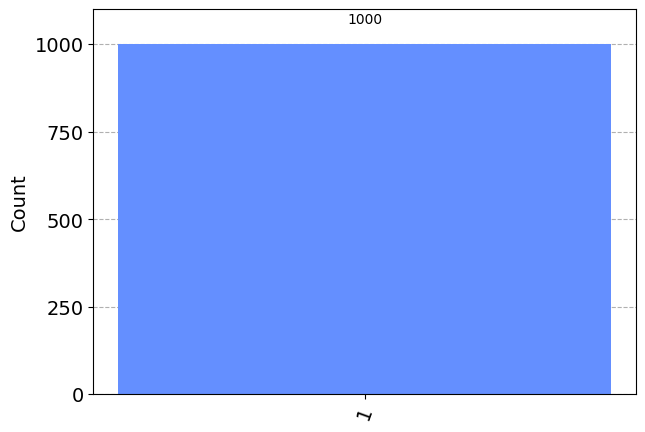

In [11]:
from qiskit.visualization import plot_histogram
display(plot_histogram(counts))

<img src="../img/d_algo.png">

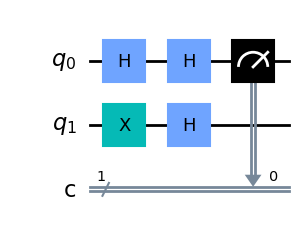

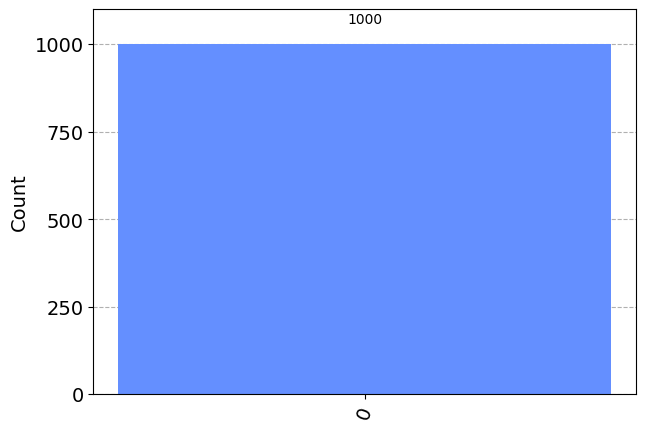

In [16]:
qc2 = QuantumCircuit(2,1)
qc2.h(0)
qc2.x(1)
qc2.h(0)
qc2.h(1)
qc2.measure(0,0)
display(qc2.draw(output='mpl'))
backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc2, backend, shots=1000).result()
counts2 = result2.get_counts(qc2)
display(plot_histogram(counts2))

## Szyfrowanie 

### BB84 - Kawantowa dystrybucja klucza

Kwantowa dystrybucja klucza z ang. Quantum Key Distribution -- QKD.

Pytania nad którymi warto się zastanowić:

- Jak dzielić klucz bez jego fizycznego wysyłania do odbiorcy przez sieć?
- Jak zakodować tekst z uzyciem klucza (To juz znamy z XOR)?
- Dlaczego QKD działa?
- Jak zasymulować algorytm BB84 w qiskit?

Rozwazmy klasyczną Alicję i Boba, którzy chcą podzielić się poufną informacją. 
Zawartość przekazywanej wiadomości nie ma znaczenia. 

### Tworzenie klucza

Alicja i Bob wymieniają się inforamcją o bazach i patrzą tylko na te kubity dla których pomiary wykonywane były w tej samej bazie. Prawdopodobieństwo, ze ich bazy się zgadzają wynosi 1/2.

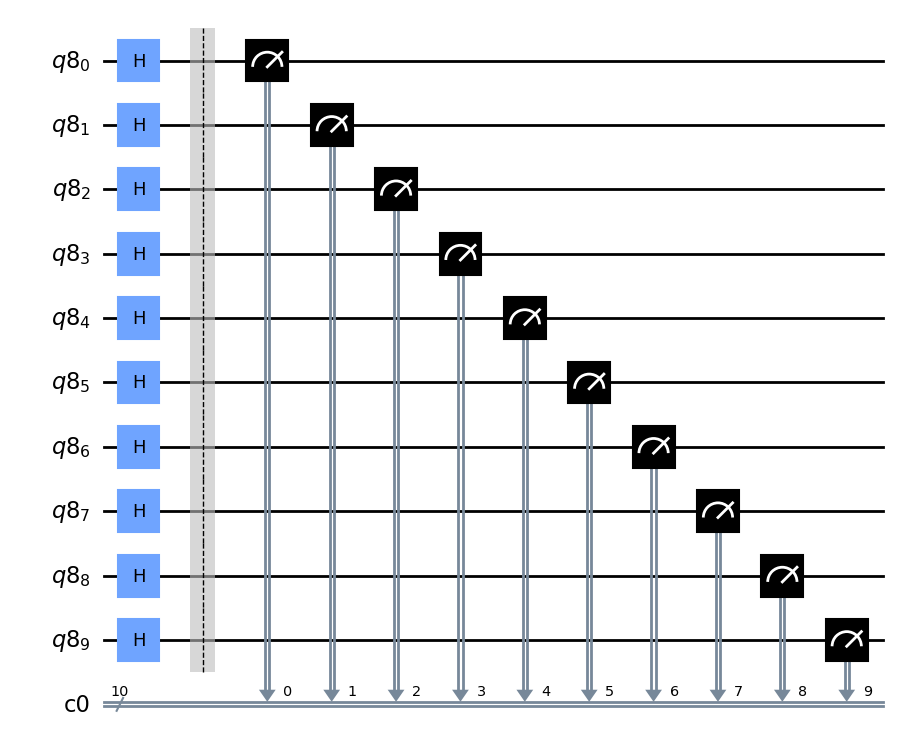

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)
qc.h(q)
qc.barrier()
qc.measure(q,c)
qc.draw('mpl')

In [19]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
counts

{'1100001100': 1}

In [20]:
wiadomosc = list(counts)[0]
wiadomosc_odw = wiadomosc[::-1]

Moze przekazać je bezpośrednio do Boba "kablem". 
Jednak w trakcie przekazywania informacji moze przejąć ją kazdy (Eve), kto tylko podłączy się "gdzieś w środku". 
Przejmie bity i ich kopię prześle do Boba. 

Poniewaz znamy juz zasady kwantowego generowania obwodów zobaczmy czy dodanie bramki hadamarda cos zmieni.
Alicja po wygenerowaniu losowej informacji przetwarza kazdy pojedynczy bit bramką Hadamarda. 
Bob podczas odczytu korzysta z faktu, iz ponowne zastosowanie bramki Hadamarda pozwoli odzyskać zakodowany bit.


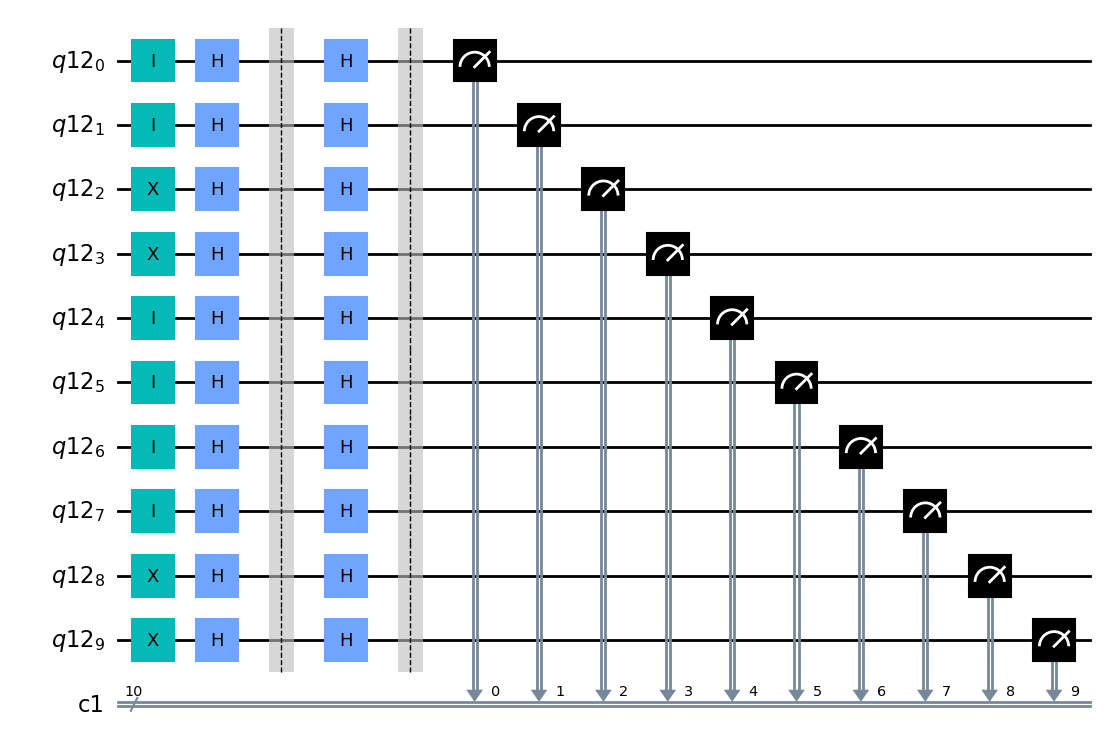

Alicja: 1100001100, Bob: {'1100001100': 1}


In [21]:
from random import randrange
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)

for i, bit in enumerate(wiadomosc_odw):
    if bit == '1':
        qc.x(q[i])
    else:
        qc.id(q[i])

qc.h(q)
qc.barrier()

qc.h(q)
qc.barrier()

qc.measure(q,c)
display(qc.draw('mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
print(f"Alicja: {wiadomosc}, Bob: {counts}")

Skoro Bob w prosty sposób moze odzyskać informację Eve równiez moze zastosować analogiczny proces. 
Najpierw zastosuje bramkę H, odczyta informację i wygeneruje kopię informacji klasycznej przemnozoną przez 
bramki Hadamarda. Bob nadal odbierze prawidłową inforamcję. 

Czy istnieje jakaś mozliwosc zabezpieczenia sie przed odzyskaniem informacji przez Eve? 
Pokazaliśmy właśnie, ze sama bramka H nie wystarczy. 

Pomysł Alicji jest następujący: 

- Zastosujmy bramki hadamarda do losowo wybranych bitów informacji. 

Czy widzisz analogię z losowaniem bazy ?? 

Postępując w ten sposób Eve nie ma mozliwosci zdecydowac dla których bitów powinna zastosować H a dla ktorych nie. A to znaczy, ze rowniez nie ma mozliwosci wysłać skopiowanej informacji dla Boba.
Stanu kubitu nie da się sklonować. 

Pytanie co ma zrobić Bob. Przekazanie informacji, które bity zostały potraktowane bramką H, w sposób klasyczny nie ma sensu.

Odpowiedzią jest schemat znany jako BB84 zaproponowany przez Chales'a Bennett'a i Gilles'a Brassard'a w 1984. 


Załózmy, ze kazdy (Alicja i Bob) mają własne generatory losowego przypisywania bramek H. 


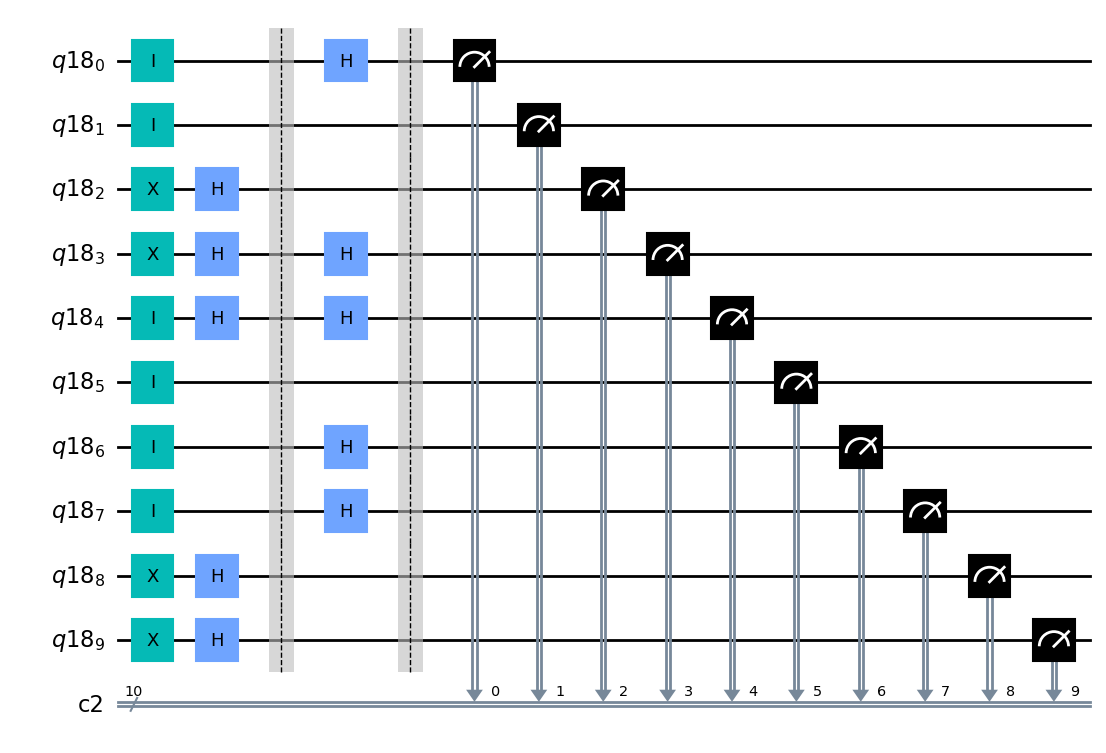

Alicja: 1100001100, Bob: {'1100001101': 1}
bob's hadamard pattern ['H', '-', '-', 'H', 'H', '-', 'H', 'H', '-', '-']


In [22]:
q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)
# Alicja 
for i, bit in enumerate(wiadomosc_odw):
    if bit == '1':
        qc.x(q[i])
    else:
        qc.id(q[i])

for i in range(10):
    if randrange(2) == 0:
        qc.h(q[i])

qc.barrier()
# Bob
bob_pattern = []
for i in range(10):
    if randrange(2) == 0:
        qc.h(q[i])
        bob_pattern.append('H')
    else:
        bob_pattern.append('-')
qc.barrier()

qc.measure(q,c)
display(qc.draw('mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
print(f"Alicja: {wiadomosc}, Bob: {counts}")
print("bob's hadamard pattern",bob_pattern)

Jakie mozliwosci się pojawiają

- Oboje sosują H do swoich bitów albo oboje ich nie stosują - dzięki temu Bob odzyskuje prawidłowy Bit.
- Jedno stosuje a drugie nie stosuje bramki H. Tutaj niezaleznie, od opcji Bob zawsze zmierzy losowo 0 lub 1. 

Prawdopodobieństwo, ze oboje wybrali to samo = $1/2$ 

Trochę inne podejście: 

Alicja genruje dwa losowe stringi bitowe (zawierają tylko 0 i 1). 
- pierwszy string koduje dwie bazy: 0 to baza obliczeniowa a 1 to baza Hadamarda. 
- drugi koduje stany kubitów: w bazie hadamarda 0 to stan "+" a 1 to stan "-", w bazie obliczeniowej -- wiadomo. 

Alicja przesyła do Boba 10 kubitów.

In [24]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator
%matplotlib inline

In [25]:
num_qubits = 10 
alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)

print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [1 0 1 0 0 1 1 0 0 1]
Alice's Bases:	 [1 0 1 0 0 0 0 0 1 1]
Bob's Bases:	 [1 0 0 1 0 1 1 1 0 1]



1. zawsze gdy chcemy przeslac 1 w kubicie alicja aplikuje bramkę X do odpowiedniego kubitu. Dla 0 nie musi podejmować zadnego działania (lub id). 
2. Jeśli ma zakodować coś w bazie Hadamarda uzywa bramki Hadamarda na odpowiedni kubit
3. wysyła przygotowane kubity do Boba
4. Bob mierzy kubity zgodnie z przygotowanym przez siebie stringiem baz. Jeśli ma zmierzyć coś w bazie Hadamarda aplikuje bramkę H. Jeśli w bazie obliczeniowej nie robi niczego. 

[film](https://www.youtube.com/watch?v=sEq1KUmKgAs)

In [26]:
def bb84_circuit(state, basis, measurement_basis):
   
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

       
    circuit.measure_all()
    
    return circuit

In [27]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
key = execute(circuit.reverse_bits(),backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 1001


Other, a nice version from book 

In [29]:
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

NUMBER_OF_CIRCUITS = 100
DOES_EVE_EXIST = True
CHECK_MARK = u'\u2713'

def create_circuits(how_many, does_eve_exist):
    circuits = []
    for i in range(how_many):
        circuits.append(make_new_circuit(does_eve_exist))
    return circuits

def make_new_circuit(eve_exists):
    circ = create_registers(eve_exists)
    alice_q = circ.qubits[0]
    bob_q = circ.qubits[1]
    bob_c = circ.clbits[0]
    circ = setup_alice(circ)
    circ.swap(alice_q, bob_q)
    if eve_exists:
        circ = setup_eve(circ)
    circ = setup_bob(circ)
    return circ

def create_registers(eve_exists):
    alice_q = QuantumRegister(1, 'alice_q')
    bob_q = QuantumRegister(1, 'bob_q')
    bob_c = ClassicalRegister(1, 'bob_c')
    if eve_exists:
        eve_c = ClassicalRegister(1, 'eve_c')
        circ = QuantumCircuit(alice_q, bob_q, bob_c, eve_c)
    else:
        circ = QuantumCircuit(alice_q, bob_q, bob_c)
    return circ


def setup_alice(circ):
    alice_q = circ.qubits[0]
    if random.getrandbits(1):
        circ.x(alice_q)
    if random.getrandbits(1):
        circ.h(alice_q)
    return circ

def setup_bob(circ):
    bob_q = circ.qubits[1]
    bob_c = circ.clbits[0]
    if random.getrandbits(1):
        circ.h(bob_q)
    circ.measure(bob_q, bob_c)
    return circ

def setup_eve(circ):
    bob_q = circ.qubits[1]
    eve_c = circ.clbits[1]
    circ.barrier()
    circ.measure(bob_q, eve_c)
    circ.barrier()
    return circ

def run_the_job(circuits):
    device = Aer.get_backend('qasm_simulator')
    job = execute(circuits, backend=device, shots=1, memory=True)
    return job.result()

def print_alice_bits(circuits):
    print('alice bits: ', end='')
    for circ in circuits:
        bit = 1 if 'x' in circ.count_ops() else 0
        print(bit, end='')
    print('')

def print_bob_bits(circuits, result):
    print('bob bits  : ', end='')
    for circ in circuits:
        memory = result.get_memory(circ)
        print(bob_bit_value(circ, memory), end='')
    print('')

def bob_bit_value(circ, memory):
    return memory[0][0]

def had_agreement(circ):
    gate_counts = circ.count_ops()
    return not ('h' in gate_counts and gate_counts['h'] == 1)

def print_had_agreements(circuits):
    number_of_agreements = 0
    print('hads agree? ', end='')
    for circ in circuits:
        if had_agreement(circ):
            print(CHECK_MARK, end='')
            number_of_agreements += 1
        else:
            print(' ', end='')
    print('')
    return number_of_agreements

def print_bit_agreements(circuits, result,number_of_agreements):
    number_tested = 0
    is_eve_detected = False
    i = 0
    print('bits agree? ', end='')
    while number_tested < number_of_agreements // 2:
        if had_agreement(circuits[i]):
            if bit_value_agreement(circuits[i], result):
                print(CHECK_MARK, end='')
                number_tested += 1
            else:
                is_eve_detected = True
                print('X')
                break
        else:
            print(' ', end='')
        i += 1
    print()
    return i, is_eve_detected

def bit_value_agreement(circ, result):
    memory = result.get_memory(circ)
    return alice_bit_value(circ) == int(
        bob_bit_value(circ, memory))

def alice_bit_value(circ):
    return 1 if 'x' in circ.count_ops() else 0

def print_key(circuits, number_of_circuits, how_many_for_testing):
    print('key      :', end='')
    for i in range(how_many_for_testing + 1):
        print(' ', end='')
    for i in range(i, NUMBER_OF_CIRCUITS):
        if had_agreement(circuits[i]):
            print(alice_bit_value(circuits[i]), end='')
        else:
            print(' ', end='')


circuits = create_circuits(NUMBER_OF_CIRCUITS, DOES_EVE_EXIST) # 1
result = run_the_job(circuits) # 2
print_alice_bits(circuits) # 3
print_bob_bits(circuits, result) # 4
number_of_agreements = print_had_agreements(circuits) # 5
how_many_for_testing, is_eve_detected = print_bit_agreements(circuits, result,number_of_agreements) # 6
if is_eve_detected:  # 7
    print('INTRUDER ALERT!')
else:
    print_key (circuits, NUMBER_OF_CIRCUITS, how_many_for_testing)

alice bits: 0101111111011100100000010011000110111101101111000111010101011011110010001001011100010001011010110000
bob bits  : 0100110000110001000000010010001010000101111111001111110111001011101011001001011001010100001000100010
hads agree? ✓✓✓✓ ✓✓  ✓✓  ✓ ✓✓✓✓✓ ✓✓ ✓  ✓✓   ✓✓ ✓   ✓✓✓✓ ✓   ✓✓ ✓    ✓ ✓✓ ✓✓   ✓✓✓   ✓     ✓    ✓✓  ✓✓ ✓✓✓✓  ✓ ✓✓
bits agree? ✓✓✓X

INTRUDER ALERT!


## Kwantowa teleportacja 

Quantum teleportation czyli kwantowa teleportacja to technika przekazu informacji (kwantowej) między wysyłającym i odbierającym. Jak poprzednio mozemy przyjąć, ze Alicja wysyła wiadomość do Boba. Informacja, którą chce przesłać Alicja to stan $|\psi\rangle=\alpha |0\rangle +\beta |1\rangle$.

Zgodnie z twierdzeniem o zakazie klonowania, nie mozna wykonac dokładnej kopii dowolnego stanu kwantowego. Oznacza to, ze Alicja nie moze przygotować swojego stanu i go sklonować w celu wysłania go do Boba. 

Uzyjemy dwóch klasycznych bitów informacji oraz splątanej pary kubitów. Ponadto trzeba pamiętać, ze w chwili kiedy Alicja wysyła swój Kubit niszczy jego stan u siebie. 

### The Quantum Teleportation Protocol

In [30]:
import numpy as np
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.result import marginal_counts

Potrzebujemy obwodu składającego się z 3 kubitów:
1. qubit Alicji
2. qubit splatany 1 (Eva-Alicja)
3. qubit splatany 2 (Eva-Bob)

i 3 klasycznych rejestrów. 

In [31]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    eva_alice_q = QuantumRegister(1, 'eva/alice (q)')
    eva_bob_q = QuantumRegister(1, 'eva/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    return QuantumCircuit(alice_q, eva_alice_q, eva_bob_q, bob_c)

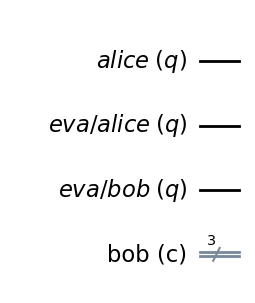

In [32]:
qc = create_registers()
qc.draw('mpl')

Przygotujmy losowy stan Alicji, który prześlemy

In [33]:
def generate_amplitudes():
    alpha = np.sqrt(random.uniform(0,1))
    beta = np.sqrt(1 - alpha**2)
    return alpha, beta

generate_amplitudes()

(0.5455988535218319, 0.8380464730763221)

Dodajemy bramki

In [34]:
def add_gates(circ, alpha, beta):
    # stan alicji q0
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    # stan splątany q1 i q2
    circ.h(1)
    circ.cnot(1,2)
    circ.barrier()
    #  alicja stosuje bramki łacząc swoj kubit i otrzymany kubit od evy
    circ.cnot(0,1)
    circ.h(0)
    circ.barrier()
    # alicja mierzy kubity i przesyla info do Boba
    circ.measure(0,0)
    circ.measure(1,1)
    # realizacja boba
    with circ.if_test((1, 1)):
        circ.x(2)
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.measure(2, 2)
    return circ

alpha = 0.7765,  beta = 0.6301


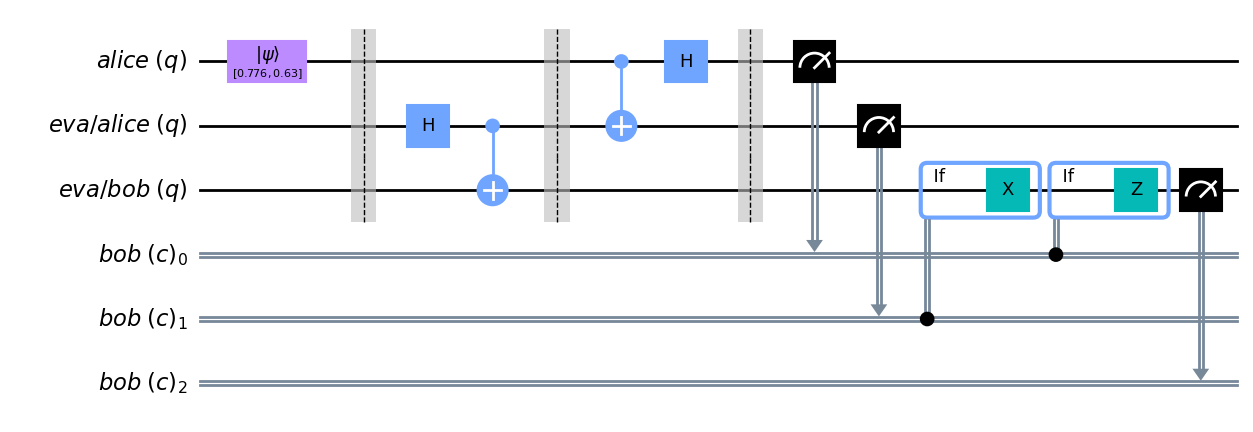

In [35]:
alpha, beta = generate_amplitudes()
print(f'alpha = {alpha:.4f},  beta = {beta:.4f}')
circ = create_registers()
circ = add_gates(circ, alpha, beta)
display(circ.draw('mpl', cregbundle=False))


In [36]:
device = Aer.get_backend("qasm_simulator")
shots = 1000
job = device.run(circ, shots=shots)
result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [2])
number_of_0s = counts_m.get('0')
number_of_1s = counts_m.get('1')
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("stan =  ({:.4f}, {:.4f})".format(alpha, beta))

stan =  (0.7880, 0.6156)


Step 4: Bob dekoder

Bob, który posiada kubit 3 q2 (wcześniej splątany) stosuje następujące bramki w zaleznosci od klasycznej
informacji, którą orzymał: 


$$00 \to Identity $$

$$01 \to Apply 𝑋 gate $$

$$ 10 \to Apply Z gate $$

$$ 11 \to Apply 𝑍𝑋 gate $$

## Shor

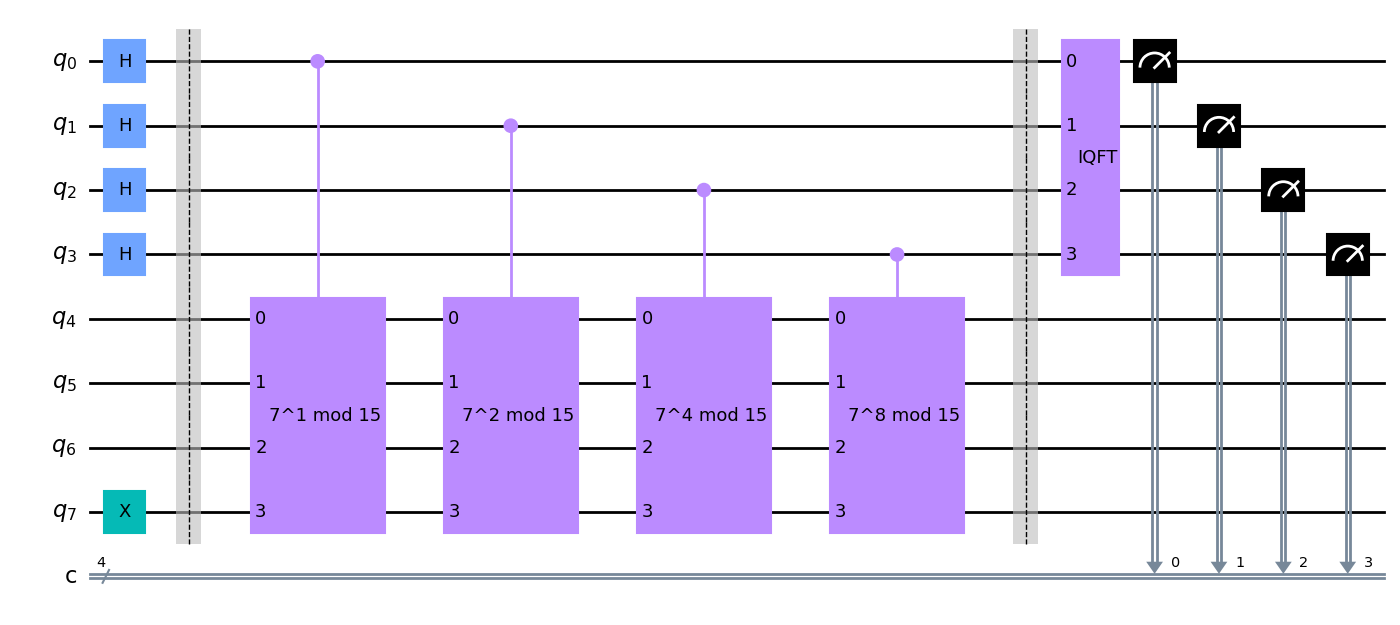

In [37]:

def initialize_qubits(given_circuit, n, m):

    given_circuit.h(range(n))
    given_circuit.x(n+m-1)

from qiskit import QuantumCircuit

def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

def modular_exponentiation(circuit, n, m, a):
    for x in range(n):
        exponent = 2**x
        circuit.append(c_amod15(a, exponent), [x] + list(range(n, n+m)))

from qiskit.circuit.library import QFT

def inverse_qft(circuit, measurement_qubits):
    circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(), measurement_qubits)

def shors_algorithm(n, m, a):
    qc = QuantumCircuit(n+m, n)
    initialize_qubits(qc, n, m)
    qc.barrier()
    modular_exponentiation(qc, n, m, a)
    qc.barrier()
    inverse_qft(qc, range(n))
    qc.measure(range(n), range(n))
    return qc
    
n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)
final_circuit.draw('mpl')

In [38]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator, shots=1000).result().get_counts(final_circuit)

In [39]:
for measured_value in counts:
    print(f"{int(measured_value[::-1], 2)}")

9
14
10
15
11
13
6
12
8
7
0
4
5


In [40]:
from math import gcd
for i in counts:
    measured_value = int(i[::-1], 2)
    if measured_value % 2 != 0:
        print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** (measured_value/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) #we saw earlier that a^(r/2)+1 or a^(r/2)-1 should be a factor of 15
    print(factors)

Measured value not even
(1, 3)
(1, 3)
Measured value not even
Measured value not even
Measured value not even
(1, 3)
(5, 3)
(1, 15)
Measured value not even
(1, 15)
(5, 3)
Measured value not even
